## **AUTHOR: Saurabh Kumar Gupta**

**Internship Task: Stock Market Prediction using Numerical and Textual Analysis**

- **Objective: Develop a hybrid predictive model that combines numerical analysis of historical stock prices with sentiment analysis of news headlines to forecast stock market performance.**

- **Stock to analyze and predict - SENSEX (S&P BSE SENSEX)**

Datasets used

Historical stock prices :https://finance.yahoo.com/ S&P BSE SENSEX (^BSESN)

Textual news headlines : https://bit.ly/36fFPI6

## DECLARING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

## LOADING DATAFRAMES

In [ ]:
# fetching data sets S&P BSE SENSEX (^BSESN)
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for SENSEX
ticker_symbol = "^BSESN"

# Download the data
stock_prices = yf.download(ticker_symbol, start="2020-02-17", end="2021-02-18", interval="1d")

[*********************100%***********************]  1 of 1 completed


#Manipulating STOCKS DATA

In [ ]:
stock_prices.reset_index(inplace=True)

In [ ]:
stock_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-17,41324.039062,41420.339844,41030.578125,41055.691406,41055.691406,6900
1,2020-02-18,41042.460938,41042.460938,40610.949219,40894.378906,40894.378906,12300
2,2020-02-19,41121.511719,41357.160156,41048.929688,41323.000000,41323.000000,5600
3,2020-02-20,41334.960938,41399.929688,41134.308594,41170.121094,41170.121094,8400
4,2020-02-24,41037.011719,41037.011719,40306.359375,40363.230469,40363.230469,8100
...,...,...,...,...,...,...,...
245,2021-02-11,51165.839844,51592.449219,51157.308594,51531.519531,51531.519531,12100
246,2021-02-12,51614.769531,51804.578125,51260.621094,51544.300781,51544.300781,15100
247,2021-02-15,51907.750000,52235.968750,51886.460938,52154.128906,52154.128906,14700
248,2021-02-16,52400.031250,52516.761719,51863.609375,52104.171875,52104.171875,21100


In [ ]:
stock_prices.shape

(250, 7)

In [ ]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.8 KB


In [ ]:
stock_prices.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,250,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2020-08-19 17:11:02.400000,39087.538641,39375.428766,38671.899852,39031.003430,39031.003430,20667.200000
min,2020-02-17 00:00:00,26499.810547,27462.869141,25638.900391,25981.240234,25981.240234,5600.000000
25%,2020-05-23 00:00:00,34369.659180,34779.932617,33975.389648,34257.097656,34257.097656,14700.000000
50%,2020-08-19 12:00:00,38489.480469,38750.359375,38234.869141,38425.974609,38425.974609,18300.000000
75%,2020-11-17 18:00:00,43859.713867,44124.125000,43502.019531,43771.066406,43771.066406,22200.000000
max,2021-02-17 00:00:00,52400.031250,52516.761719,51886.460938,52154.128906,52154.128906,188300.000000
std,NaN,6180.496030,6096.178471,6264.257902,6205.981761,6205.981761,16552.187281


In [ ]:
stock_prices.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
stock_prices.dropna(inplace=True)

In [ ]:
stock_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-17,41324.039062,41420.339844,41030.578125,41055.691406,41055.691406,6900
1,2020-02-18,41042.460938,41042.460938,40610.949219,40894.378906,40894.378906,12300
2,2020-02-19,41121.511719,41357.160156,41048.929688,41323.000000,41323.000000,5600
3,2020-02-20,41334.960938,41399.929688,41134.308594,41170.121094,41170.121094,8400
4,2020-02-24,41037.011719,41037.011719,40306.359375,40363.230469,40363.230469,8100



#MANIPULATING NEWS HEADLINE DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
news_headlines = pd.read_csv('/content/drive/MyDrive/india-news-headlines.csv')

In [ ]:
news_headlines.tail()

,publish_date,headline_category,headline_text
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...
3650969,20220331,city.salem,Tamil Nadu sees marginal rise of Covid cases w...


In [ ]:
news_headlines

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [ ]:
headline = news_headlines[news_headlines['headline_category']!='unknown']

In [ ]:
headline.head()

,publish_date,headline_category,headline_text
85,20010102,entertainment.hindi.bollywood,Raju Chacha
126,20010103,entertainment.hindi.bollywood,'Devdas': Jinxed?
272,20010104,india,Dudhwa tiger died of starvation; not poisoning
273,20010104,city.bengaluru,Three in race for chief secy's post
274,20010104,city.patna,Druggists' stir leads to shortage of medicines


In [ ]:
np.shape(headline)

(3441387, 3)

In [ ]:
headline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3441387 entries, 85 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 105.0+ MB


In [ ]:
headline['publish_date'] = pd.to_datetime(headline['publish_date'], format='%Y%m%d')

<ipython-input-90-e15fa5141bc9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
headline = headline[['publish_date', 'headline_text']]

In [ ]:
headline.drop_duplicates(subset='headline_text',keep='first',inplace=True)

In [ ]:
headline['headline_text'] = headline.groupby('publish_date').transform(lambda x: ' '.join(x.astype(str)))

In [ ]:
headline

,publish_date,headline_text
85,2001-01-02,Raju Chacha
126,2001-01-03,'Devdas': Jinxed?
272,2001-01-04,Dudhwa tiger died of starvation; not poisoning...
273,2001-01-04,Dudhwa tiger died of starvation; not poisoning...
274,2001-01-04,Dudhwa tiger died of starvation; not poisoning...
...,...,...
3650960,2022-03-31,Shashank goes back to coastal Karnataka and Mo...
3650961,2022-03-31,Shashank goes back to coastal Karnataka and Mo...
3650962,2022-03-31,Shashank goes back to coastal Karnataka and Mo...
3650965,2022-03-31,Shashank goes back to coastal Karnataka and Mo...


In [ ]:
headline.drop_duplicates(subset='headline_text',keep='first',inplace=True)

In [ ]:
headline

,publish_date,headline_text
85,2001-01-02,Raju Chacha
126,2001-01-03,'Devdas': Jinxed?
272,2001-01-04,Dudhwa tiger died of starvation; not poisoning...
404,2001-01-05,Nepal won't allow anti-India activities: Envoy...
642,2001-01-10,Fend for yourselves; Pande tells doctors Burea...
...,...,...
3648472,2022-03-27,Playing a dead man in Body God meant sitting i...
3648972,2022-03-28,As fashion becomes democratic; demand for styl...
3649472,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...
3649972,2022-03-30,I will not give in to trends: Dossmode The tim...


## SENITIMENTAL ANALYSIS

**DECLARING LIBRARIES**

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**CREATING MODEL**

In [ ]:
model = SentimentIntensityAnalyzer()

**Polarity:**

**Measure of how positive or negative or neutral a statement is.**

In [ ]:
headline['polarity_score'] = [TextBlob(x).sentiment.polarity for x in headline['headline_text']]

**Subjectivity:**

**It is a measure of is the statment factual(Objectivity) or it just refer to personal opinion, emotions and judgement(Subjectivity).**

In [ ]:
headline['subjectivity_score'] = [TextBlob(x).sentiment.subjectivity for x in headline['headline_text']]

**CHECKING THE SCORES FOR EACH HEADLINE**

In [ ]:
x = [model.polarity_scores(x)['pos'] for x in headline['headline_text']]

In [ ]:
headline['positive'] = x

In [ ]:
headline

,publish_date,headline_text,polarity_score,subjectivity_score,positive
85,2001-01-02,Raju Chacha,0.000000,0.000000,0.000
126,2001-01-03,'Devdas': Jinxed?,0.000000,0.000000,0.000
272,2001-01-04,Dudhwa tiger died of starvation; not poisoning...,0.000000,0.000000,0.067
404,2001-01-05,Nepal won't allow anti-India activities: Envoy...,1.000000,0.300000,0.265
642,2001-01-10,Fend for yourselves; Pande tells doctors Burea...,0.000000,0.000000,0.000
...,...,...,...,...,...
3648472,2022-03-27,Playing a dead man in Body God meant sitting i...,0.024911,0.370829,0.081
3648972,2022-03-28,As fashion becomes democratic; demand for styl...,0.057784,0.380937,0.098
3649472,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...,0.097192,0.403018,0.084
3649972,2022-03-30,I will not give in to trends: Dossmode The tim...,0.037869,0.349277,0.075


In [ ]:
y = [model.polarity_scores(x)['neg'] for x in headline['headline_text']]

In [ ]:
headline['negative'] = y

In [ ]:
headline

,publish_date,headline_text,polarity_score,subjectivity_score,positive,negative
85,2001-01-02,Raju Chacha,0.000000,0.000000,0.000,0.000
126,2001-01-03,'Devdas': Jinxed?,0.000000,0.000000,0.000,0.000
272,2001-01-04,Dudhwa tiger died of starvation; not poisoning...,0.000000,0.000000,0.067,0.123
404,2001-01-05,Nepal won't allow anti-India activities: Envoy...,1.000000,0.300000,0.265,0.105
642,2001-01-10,Fend for yourselves; Pande tells doctors Burea...,0.000000,0.000000,0.000,0.277
...,...,...,...,...,...,...
3648472,2022-03-27,Playing a dead man in Body God meant sitting i...,0.024911,0.370829,0.081,0.153
3648972,2022-03-28,As fashion becomes democratic; demand for styl...,0.057784,0.380937,0.098,0.159
3649472,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...,0.097192,0.403018,0.084,0.152
3649972,2022-03-30,I will not give in to trends: Dossmode The tim...,0.037869,0.349277,0.075,0.153


In [109]:
z = [model.polarity_scores(x)['neu'] for x in headline['headline_text']]

In [118]:
headline['neutral'] = z

In [113]:
w = [model.polarity_scores(x)['compound'] for x in headline['headline_text']]

In [117]:
headline['compound'] = w

In [116]:
headline

,publish_date,headline_text,polarity_score,subjectivity_score,positive,negative,neutral
85,2001-01-02,Raju Chacha,0.000000,0.000000,0.000,0.000,1.000
126,2001-01-03,'Devdas': Jinxed?,0.000000,0.000000,0.000,0.000,1.000
272,2001-01-04,Dudhwa tiger died of starvation; not poisoning...,0.000000,0.000000,0.067,0.123,0.810
404,2001-01-05,Nepal won't allow anti-India activities: Envoy...,1.000000,0.300000,0.265,0.105,0.630
642,2001-01-10,Fend for yourselves; Pande tells doctors Burea...,0.000000,0.000000,0.000,0.277,0.723
...,...,...,...,...,...,...,...
3648472,2022-03-27,Playing a dead man in Body God meant sitting i...,0.024911,0.370829,0.081,0.153,0.765
3648972,2022-03-28,As fashion becomes democratic; demand for styl...,0.057784,0.380937,0.098,0.159,0.743
3649472,2022-03-29,Bobby Deol: Like my dad; I hope to be working ...,0.097192,0.403018,0.084,0.152,0.764
3649972,2022-03-30,I will not give in to trends: Dossmode The tim...,0.037869,0.349277,0.075,0.153,0.772


## PLOTING STOCKS CLOSING POINTS

Text(0, 0.5, 'Close Price ($)')

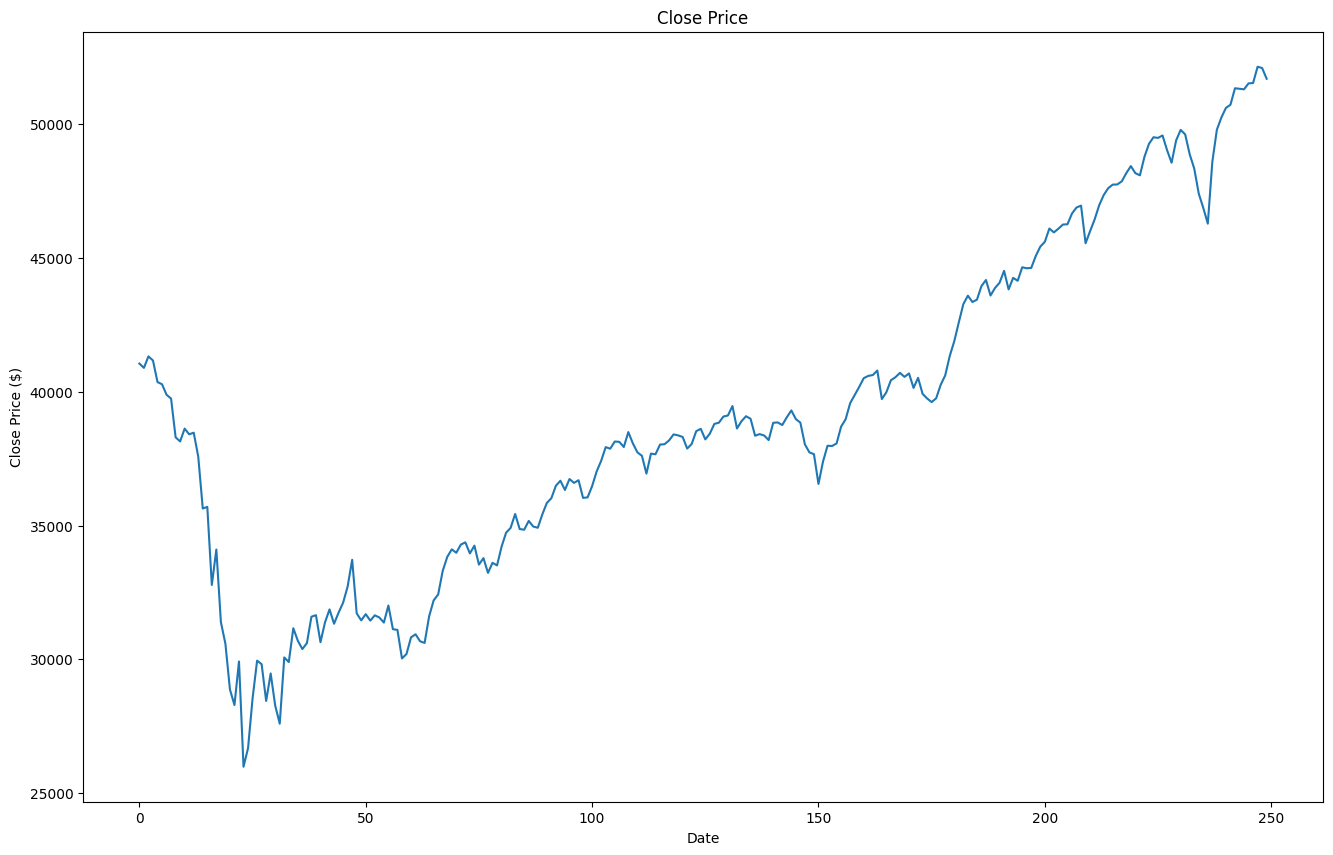

In [120]:
import matplotlib.pyplot as plt
# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
stock_prices['Close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')


## PLOTTING MOVING WINDOW AVERAGE CLOSE POINTS

In [123]:
!pip install -U kaleido
import kaleido
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=stock_prices['Date'],y=stock_prices['Close'].rolling(window = 10).mean(),
                          name='Average Moving Window(10)',mode='lines'))
fig.add_trace(go.Scatter(x=stock_prices['Date'],y=stock_prices['Close'],
                          name='Closing Points',mode='lines'))
fig.update_layout(title='Moving Window Average(10)',xaxis_title='Date')

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [124]:
!pip install -U kaleido
import kaleido
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=stock_prices['Date'],y=stock_prices['Close'].rolling(window = 10).mean(),
                          name='Average Moving Window(20)',mode='lines'))
fig.add_trace(go.Scatter(x=stock_prices['Date'],y=stock_prices['Close'],
                          name='Closing Points',mode='lines'))
fig.update_layout(title='Moving Window Average(20)',xaxis_title='Date')

fig.show()

In [125]:
!pip install -U kaleido
import kaleido
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=stock_prices['Date'],y=stock_prices['Close'].rolling(window = 10).mean(),
                          name='Average Moving Window(30)',mode='lines'))
fig.add_trace(go.Scatter(x=stock_prices['Date'],y=stock_prices['Close'],
                          name='Closing Points',mode='lines'))
fig.update_layout(title='Moving Window Average(30)',xaxis_title='Date')

fig.show()

## MANIPULATING DATAFRAMES TO MERGE

In [126]:
headline.rename(columns={'publish_date':'Date'},inplace=True)

In [127]:
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], format='%Y%m%d',infer_datetime_format=True)

<ipython-input-127-bfbc9c9e3db2>:1: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



In [128]:
df = pd.merge(stock_prices,headline,on='Date',how='inner')

In [129]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,polarity_score,subjectivity_score,positive,negative,neutral,compound
0,2020-02-17,41324.039062,41420.339844,41030.578125,41055.691406,41055.691406,6900,VIDEO STORY: Dr.samir Parikh's tips for kids a...,0.056508,0.342316,0.080,0.169,0.751,-0.9999
1,2020-02-18,41042.460938,41042.460938,40610.949219,40894.378906,40894.378906,12300,'Mammukka didn't want Kadakkal Chandran to res...,0.078717,0.360463,0.075,0.145,0.780,-0.9999
2,2020-02-19,41121.511719,41357.160156,41048.929688,41323.000000,41323.000000,5600,AAP's Delhi win won't impact Goa voters: Digam...,0.041818,0.353285,0.083,0.186,0.732,-1.0000
3,2020-02-20,41334.960938,41399.929688,41134.308594,41170.121094,41170.121094,8400,'Some houses of Jamtara villagers bigger than ...,0.068827,0.383781,0.072,0.154,0.774,-0.9999
4,2020-02-24,41037.011719,41037.011719,40306.359375,40363.230469,40363.230469,8100,Horoscope Today; February 24; 2020: Check astr...,0.042636,0.400925,0.065,0.143,0.792,-0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2021-02-11,51165.839844,51592.449219,51157.308594,51531.519531,51531.519531,12100,Munger-Bhagalpur NH-80 to be four-lane #Weeken...,0.037067,0.368662,0.070,0.151,0.778,-0.9999
246,2021-02-12,51614.769531,51804.578125,51260.621094,51544.300781,51544.300781,15100,Tips to make sex less uncomfortable and more e...,0.002138,0.347881,0.075,0.141,0.784,-0.9999
247,2021-02-15,51907.750000,52235.968750,51886.460938,52154.128906,52154.128906,14700,Vaccine a potent weapon to fight off coronavir...,0.020785,0.377399,0.082,0.161,0.757,-0.9999
248,2021-02-16,52400.031250,52516.761719,51863.609375,52104.171875,52104.171875,21100,Simple ways to help your man last longer in be...,0.049608,0.388322,0.088,0.149,0.763,-0.9999


In [130]:
stocks_news_df = final_df = df[['Close', 'polarity_score', 'negative', 'neutral',
                                'positive', 'compound', 'subjectivity_score']]

In [131]:
stocks_news_df

,Close,polarity_score,negative,neutral,positive,compound,subjectivity_score
0,41055.691406,0.056508,0.169,0.751,0.080,-0.9999,0.342316
1,40894.378906,0.078717,0.145,0.780,0.075,-0.9999,0.360463
2,41323.000000,0.041818,0.186,0.732,0.083,-1.0000,0.353285
3,41170.121094,0.068827,0.154,0.774,0.072,-0.9999,0.383781
4,40363.230469,0.042636,0.143,0.792,0.065,-0.9999,0.400925
...,...,...,...,...,...,...,...
245,51531.519531,0.037067,0.151,0.778,0.070,-0.9999,0.368662
246,51544.300781,0.002138,0.141,0.784,0.075,-0.9999,0.347881
247,52154.128906,0.020785,0.161,0.757,0.082,-0.9999,0.377399
248,52104.171875,0.049608,0.149,0.763,0.088,-0.9999,0.388322


## DECLARING LIBRARIES FOR TRAINING AND EVALUATING PURPOSE

In [132]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

In [133]:
# features
X = stocks_news_df.iloc[:,1:].values

# labels
Y = stocks_news_df.iloc[:,0].values

In [134]:
np.shape(X)

(250, 6)

In [135]:
X[:5]

array([[ 0.05650808,  0.169     ,  0.751     ,  0.08      , -0.9999    ,
         0.3423159 ],
       [ 0.0787166 ,  0.145     ,  0.78      ,  0.075     , -0.9999    ,
         0.36046347],
       [ 0.04181781,  0.186     ,  0.732     ,  0.083     , -1.        ,
         0.35328501],
       [ 0.06882747,  0.154     ,  0.774     ,  0.072     , -0.9999    ,
         0.3837808 ],
       [ 0.04263609,  0.143     ,  0.792     ,  0.065     , -0.9999    ,
         0.40092544]])

In [136]:
np.shape(Y)

(250,)

In [137]:
Y[:5]

array([41055.69140625, 40894.37890625, 41323.        , 41170.12109375,
       40363.23046875])

## Pre-Processing Data

In [138]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.20,random_state=0)

## CREATING DECISION TREE REGRESSOR MODEL

In [139]:
clf = tree.DecisionTreeRegressor().fit(train_X,train_Y)

In [140]:
r_sq = clf.score(train_X,train_Y)
print('coeffiecent of determination: ', r_sq)

coeffiecent of determination:  1.0


## EVALUATE DECISION TREE REGRESSOR

In [141]:
pred_y=clf.predict(test_X)

**COMPARING ACTUAL AND PREDICTED VALUES**

In [150]:
!pip install -U kaleido
import kaleido
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(y=test_Y, name='Actual Closing Points'))
fig.add_trace(go.Bar(y=pred_y, name='Predicted Closing Points'))
fig.update_layout(title='Comparison between Actual and Predicted Closing')

fig.show()

In [151]:
print('Mean Absolute Error:',
      metrics.mean_absolute_error(test_Y, pred_y))

Mean Absolute Error: 7813.185625


In [152]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(train_X,train_Y)

In [153]:
pred_Y=rf.predict(test_X)

In [157]:
fig = go.Figure()
fig.add_trace(go.Bar(y=test_Y, name='Actual Closing Points'))
fig.add_trace(go.Bar(y=pred_Y, name='Predicted Closing Points'))
fig.update_layout(title='Comparison between Actual and Predicted Closing')
fig.show()

In [158]:
print('Mean Absolute Error:',
      metrics.mean_absolute_error(test_Y, pred_Y))

Mean Absolute Error: 4459.115688671875


**Random Forest Regressor work better compared to Decision Tree**